In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

#### The following tables and data is from the "On the Mode of Communication of Cholera (2nd edition)" by Dr. John Snow. (published in 1854)

##### Table 1: broad street outbreak mortality 1854

In [85]:
start_date = date(1854,8,19)
end_date = date(1854,10,1)
dates = list(pd.date_range(start_date, end_date-timedelta(days=1),freq='d').astype('str'))
dates.append('Unknown Date')

In [86]:
number_of_fatal_attacks = [1,1,1,0,1,1,0,1,1,1,1,8,56,143,116,54,46,36,20,28,12,11,5,5,1,3,0,1,4,2,3,0,0,2,1,1,1,1,1,1,0,0,0,45]

# Sanity Check
pd.Series(number_of_fatal_attacks).sum()

616

In [87]:
deaths = [1,0,2,0,0,2,0,0,1,0,1,2,3,70,127,76,71,45,37,32,30,24,18,15,6,13,6,8,6,5,2,3,0,0,2,3,0,0,2,0,2,1,0,0]

# check
pd.Series(deaths).sum()

616

In [88]:
# creating the dataframe with index as the day count
table_1_df = pd.DataFrame({'Date': dates,
                            'No. of Fatal Attacks': number_of_fatal_attacks,
                           'Deaths': deaths}, index=range(1,45))
table_1_df.head()

,Date,No. of Fatal Attacks,Deaths
1,1854-08-19,1,1
2,1854-08-20,1,0
3,1854-08-21,1,2
4,1854-08-22,0,0
5,1854-08-23,1,0


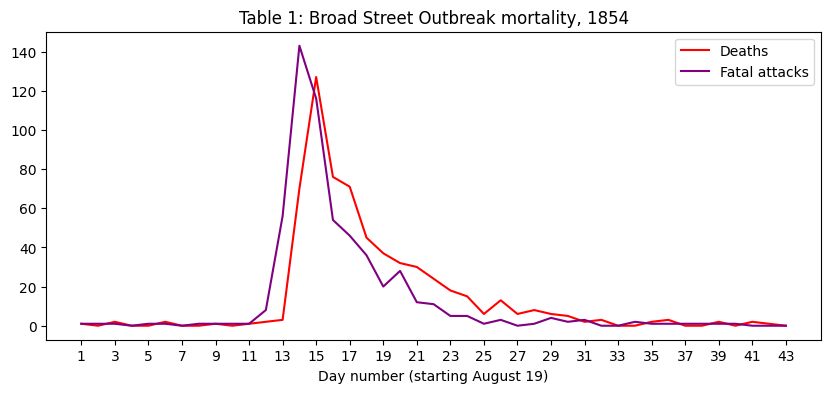

In [89]:
# plot

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(table_1_df['Deaths'][:-1], label='Deaths', color='red')
ax.plot(table_1_df['No. of Fatal Attacks'][:-1], label='Fatal attacks', color='purple')
ax.set_title('Table 1: Broad Street Outbreak mortality, 1854')
ax.set_xlabel('Day number (starting August 19)')

ax.set_xticks(range(1,44,2))
ax.legend()

plt.show()

The pump handle was removed on the moring of september 8th. that is day 21, well past the peak of the outbreak. 

note that we did not include the 45 fatalities whose attack date is not known but death dates are known. 

##### table 2: 1832 water supply and cholera deaths by districts



##### table 3: 1849 water supply and cholera deaths by districts



##### table 4: death in southvark, lambeth and kent areas



##### table 5: weekly return of birth and death in december 1853 when cholera had mostly disappeared



##### table 6: august 1853 to jan 1854 southvark vs lambeth deaths



##### table 7: mortality from cholera in four weeks ending 5 august 1853



##### table 8: mortality from cholera in four weeks ending 26 august 1853



##### table 9: southvark vs lambeth deaths during the first seven weeks of the epidemic of 1853


In [90]:
number_of_houses = [40046, 26107, 256423]
deaths_from_cholera = [1263,98,1422]
deaths_in_each_10000_houses = [315, 37, 59]

table_9_df = pd.DataFrame({'Number of houses': number_of_houses,
              'Deaths from Cholera': deaths_from_cholera,
              'Deaths in each 10000 houses': deaths_in_each_10000_houses},
              index=['Southvark and Vauxhall Company', 'Lambeth Company', 'Rest of London'])

table_9_df

,Number of houses,Deaths from Cholera,Deaths in each 10000 houses
Southvark and Vauxhall Company,40046,1263,315
Lambeth Company,26107,98,37
Rest of London,256423,1422,59


In [91]:
table_9_df_check = table_9_df.copy()

table_9_df_check['check death proportion'] = (table_9_df_check['Deaths from Cholera'] / table_9_df_check['Number of houses']) * 10000

table_9_df_check

,Number of houses,Deaths from Cholera,Deaths in each 10000 houses,check death proportion
Southvark and Vauxhall Company,40046,1263,315,315.387305
Lambeth Company,26107,98,37,37.537825
Rest of London,256423,1422,59,55.455244


the last entry does not match. i wonder why?


##### table 10: sourthvark vs lambeth deaths during the next seven weeks of the epidemic of 1853 (three other companies included)


In [92]:
start_date = date(1854,9,2)
end_date = date(1854,10,15)
week_ending = pd.date_range(start_date,periods=7,freq='7d')

In [93]:
total_deaths_from_cholera = [670, 972, 856, 724, 383, 200, 115]
southvark_deaths = [399, 580, 524, 432, 228, 121, 69]
lambeth_deaths = [45, 72, 66, 72, 25, 14, 8]
kent_deaths = [38, 45, 48, 28, 19, 10, 3]
pumps_and_other_deaths = [72, 62, 44, 62, 24, 9, 6]
uncertain_source_deaths = [116, 213, 174, 130, 87, 46, 29]

In [94]:
table_10_df = pd.DataFrame({'Deaths from Cholera': total_deaths_from_cholera,
              'Southvark and Vauxhall': southvark_deaths,
              'Lambeth': lambeth_deaths,
              'Kent Company': kent_deaths,
              'Pumps and other sources': pumps_and_other_deaths,
              'Not ascertained': uncertain_source_deaths},
              index=week_ending)

table_10_df

,Deaths from Cholera,Southvark and Vauxhall,Lambeth,Kent Company,Pumps and other sources,Not ascertained
1854-09-02,670,399,45,38,72,116
1854-09-09,972,580,72,45,62,213
1854-09-16,856,524,66,48,44,174
1854-09-23,724,432,72,28,62,130
1854-09-30,383,228,25,19,24,87
1854-10-07,200,121,14,10,9,46
1854-10-14,115,69,8,3,6,29


In [95]:
table_10_df_check = table_10_df.copy()

table_10_df_check['Total Deaths'] = table_10_df_check['Southvark and Vauxhall'] + table_10_df_check['Lambeth'] + table_10_df_check['Kent Company'] + table_10_df_check['Pumps and other sources'] + table_10_df_check['Not ascertained']

table_10_df_check[['Deaths from Cholera', 'Total Deaths']]

,Deaths from Cholera,Total Deaths
1854-09-02,670,670
1854-09-09,972,972
1854-09-16,856,856
1854-09-23,724,724
1854-09-30,383,383
1854-10-07,200,200
1854-10-14,115,115


the following sums match the last row of the table.

In [96]:
table_10_df_check.sum()

Deaths from Cholera        3920
Southvark and Vauxhall     2353
Lambeth                     302
Kent Company                191
Pumps and other sources     279
Not ascertained             795
Total Deaths               3920
dtype: int64


##### table 11: combination of table 7,8 and 10 to calculate deaths in 14 weeks of the epidemic, ending october 14



##### table 12: comparision of deaths in london subdistricts in 1849 and 1854 by water company



##### table 13: 1854 epidemic, 15 weeks ending october 21, death comparision by chealsea water company and southvark water company. 



##### unnumbered table: showing london and other city populations that were hit by the epidemic


In [97]:
number_of_places = [52, 43, 33, 34]
duration_in_days = ['0 to 50', '50 to 100', '100 and upwards', '100 and upwards']
average_population = [6624, 12624, 38123, 78823]

note: its misprinted in the digital pamplet '50 to 100000' instead of '50 to 100'

In [98]:
table_13_1_df = pd.DataFrame({'No. of Places': number_of_places,
              'Duration in Days': duration_in_days,
              'Average Population': average_population})

table_13_1_df

,No. of Places,Duration in Days,Average Population
0,52,0 to 50,6624
1,43,50 to 100,12624
2,33,100 and upwards,38123
3,34,100 and upwards,78823



##### table 14: cholera deaths by occupation (which year? 1854?)



In [99]:
index = ['Agents', 'Bricklayers and builders', 'Cowkeepers, dairymen, and milkmen', 'Egg merchants', 
         'Fishmongers','Fruiterers and greengrocers', 'Jobmasters, livery-stable keepers', 'Oilmen', 
         'Paper-makers', 'Poulterers', 'Sail-makers', 'Turners', 'Ballast-heavers', 
         'Coal-porters and coal-heavers', 'Dustmen and scavengers', 'Founders', 'Hawkers, etc', 
         'Lithographers', 'Modellers', 'Polishers', 'Sailors, including Greenwich pensioners', 
         'Tanners', 'Weavers', 'Physicians, surgeoons & general practioners', 
         'Magistrates, barristers, conveyancers, and attorneys', 'Merchants', 'Auctioners', 
         'Saddlers', 'Brass-finishers', 'Coach-makers', 'Cork-cutters',
         'Footmen and men-servants', 'Jewellers, goldsmiths, and silversmiths', 'Millwrights',
         'Tallow-chandlers', 'Type-founders', 'Undertakers', 'Warehousemen', 
         'Watchmakers', 'Wheelwrights']

no_of_deaths = [12,14,8,5,11,12,5,13,2,3,2,2,7,53,6,10,67,3,3,4,
                299,22,102,16,13,11,1,1,3,16,2,25,6,2,2,1,2,8,11,8]

ratio_numbers = [49,39,20,6,20,28,37,46,15,32,30,50,24,32,39,12,22,48,41,36,24,39,36,
                 265,375,348,266,250,318,262,279,1572,583,266,430,390,325,472,364,294]

ratio = [f'1 in {x}' for x in ratio_numbers]

In [100]:
# sanity check

len(index), len(no_of_deaths), len(ratio)

(40, 40, 40)

In [101]:
table_14_df = pd.DataFrame({'No. of Deaths': no_of_deaths,
              'Ratio': ratio}, index=index)

table_14_df.head()

,No. of Deaths,Ratio
Agents,12,1 in 49
Bricklayers and builders,14,1 in 39
"Cowkeepers, dairymen, and milkmen",8,1 in 20
Egg merchants,5,1 in 6
Fishmongers,11,1 in 20


In [108]:
table_14_modified = table_14_df.copy()

table_14_modified['Ratio in decimal'] = pd.Series([1/x for x in ratio_numbers])

In [110]:
table_14_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Agents to Wheelwrights
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No. of Deaths     40 non-null     int64  
 1   Ratio             40 non-null     object 
 2   Ratio in decimal  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


why isn't this working?